In [1]:
import time
import numpy as np
# import h5py
import matplotlib

In [2]:
# magic: live load plot library functions to allow figures in notebook
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as ip

In [4]:
def graphic_norm(Z):
    I = np.abs(Z)
    I = I - I.min().min()
    I = I / I.max().max()
    return I

In [5]:
# convert the (float) values in 2-d M to integers 0 - nColors (unique values in M)
def flatIndex(M):
    if spar.issparse(M):
        M = spar.todense(M)
    A = M.copy()
    A = np.reshape(A,A.size,1)
    ixA = np.argsort(A)
    A = np.sort(A)
    currV = A[0]
    nDx = 0
    for k in range(0,A.size):
        if A[k] != currV:
            nDx += 1
        A[k] = nDx
    A[ixA] = A
    A = np.reshape(A, (M.shape[0], M.shape[1]))
    A = np.int_(A)
    nClrs = nDx + 1
    return A, nClrs

In [6]:
def heat_colormap(n_colors):
    mp0 = resizeColorMap(
        np.array([[1.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.0, 0.0, 1.0]]),
        n_colors)
    
    return mp0

In [7]:
def resizeColorMap(mp0, nClrs):
    mp = np.zeros((nClrs,3))
    nClrs0 = mp0.shape[0]
    if nClrs0 != nClrs:
        tc = nClrs0 * nClrs
        x = np.linspace(1,tc, nClrs0)
        xq = np.linspace(1,tc, nClrs)
        mp[:,0] = np.interp(xq, x, mp0[:,0])
        mp[:,1] = np.interp(xq, x, mp0[:,1])
        mp[:,2] = np.interp(xq, x, mp0[:,2])
    return mp

In [8]:
def int_arr_image(int_arr, n_colors):
    """ 
    """
    nRows = int_arr.shape[0]
    nCols = int_arr.shape[1]
    
    M = np.zeros((nRows, nCols, 3))
    mp = heat_colormap(n_colors+1)
    
    for r in range(0,nRows):
        for c in range(0,nCols):
            M[r, c, 0] = mp[int_arr[r, c], 0]
            M[r, c, 1] = mp[int_arr[r, c], 1]
            M[r, c, 2] = mp[int_arr[r, c], 2]
            
    return M

In [9]:
def complex_plane_grid(rows, cols, center_point, theta, zoom):
    if rows > cols:
        up = rows / cols
        right = 1
    else:
        up = 1
        right = cols / rows
    upV = up * np.exp((theta + np.pi / 2) * 1j) / zoom
    rightV = right * np.exp(theta * 1j) / zoom
    urc = center_point + upV + rightV
    ulc = center_point + upV - rightV
    llc = center_point - upV - rightV
    lrc = center_point - upV + rightV
    
    left_style = np.linspace(ulc, llc, rows)
    right_style = np.linspace(urc, lrc, rows)
    
    Z_grid = np.array(np.zeros((rows, cols)), dtype=complex)
    
    for r in range(0,rows):
        Z_grid[r, :] = np.linspace(left_style[r], right_style[r], cols)
    
    return Z_grid


In [10]:
def julia_set(Z0, p, et_max, et_dist):
    Z_grid = Z0.copy()
    ET = np.zeros(Z_grid.shape, dtype='int32')
    for r in range(0, Z_grid.shape[0]):
        for c in range(0, Z_grid.shape[1]):
            z = Z_grid[r, c]
            while (abs(z - Z_grid[r, c]) < et_dist) & (ET[r, c] < et_max):
                ET[r, c] += 1
                z = z**2 - p
            Z_grid[r, c] = z
                
    return Z_grid, ET
            

In [11]:
def Mandelbrot_set(Z0, et_max, et_dist):
    Z_grid = Z0.copy()
    ET = np.zeros(Z_grid.shape, dtype='int32')
    for r in range(0, Z_grid.shape[0]):
        for c in range(0, Z_grid.shape[1]):
            z = Z_grid[r, c]
            p = z
            while (abs(z - Z_grid[r, c]) < et_dist) & (ET[r, c] < et_max):
                ET[r, c] += 1
                z = z**2 - p
            Z_grid[r, c] = z
                
    return Z_grid, ET
            

In [12]:
def unicorn_in_utero(Z0, p, et_max, et_dist):
    Z_grid = Z0.copy()
    # p = [2.76544+0.997995j, 50.1518+7.53287j]
    p0 = 3.0/2.0
    p1 = p[0]
    p2 = p[1]
    ET = np.zeros(Z_grid.shape, dtype='int32')
    for r in range(0, Z_grid.shape[0]):
        for c in range(0, Z_grid.shape[1]):
            z0 = Z_grid[r, c]
            zN = z0
            while (np.isfinite(zN)) & (abs(zN - z0) < et_dist) & (ET[r, c] < et_max):
                z = zN
                ET[r, c] += 1
                zN = z**(p0 * z**(1j * p1**(p0 * z**p2)))
            Z_grid[r, c] = z
            
    return Z_grid, ET
            

In [13]:
# decPwrAFx.m Sep 2008, p = np.array([3.67363242 -1.80645675])
#for n = 1:nc
    #Z = 1/Z + -1^n * Z^( n*Z^(c(n)^n )/k);
#end
def decPwrAFx(Z0, p, et_max, et_dist):
    Z_grid = Z0.copy()
    sqr_pi = np.sqrt(np.pi)
    n_pars = p.size
    ET = np.zeros(Z_grid.shape, dtype='int32')
    for r in range(0, Z_grid.shape[0]):
        for c in range(0, Z_grid.shape[1]):
            z0 = Z_grid[r, c]
            zN = z0
            while (np.isfinite(zN)) & (abs(zN - z0) < et_dist) & (ET[r, c] < et_max):
                z = zN
                ET[r, c] += 1
                for n in range(0, n_pars):
                    pn = p[n]**n
                    zN = 1/z - z**(n * z**pn / sqr_pi)
                    
            Z_grid[r, c] = z
            
    return Z_grid, ET

In [14]:
Z_grid = complex_plane_grid(rows=180, cols=180, center_point=0.0, theta=0, zoom=2)

[-2.51964262 -0.3740723  -1.53371632 -1.2484523 ]


/Users/mojo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: overflow encountered in cdouble_scalars


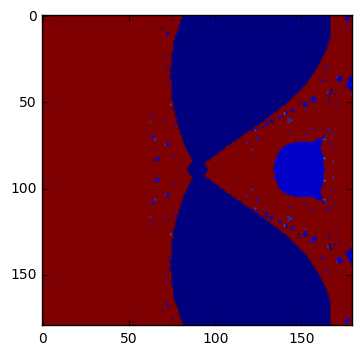

In [15]:
#p = np.array([3.67363242, -1.80645675])
#p = np.array([-1.62614788  0.89062012])
npars = 4
p = np.random.rand(npars) * 3
for n in range(0, npars):
    p[n] = p[n] * (-1)**(np.round(0.5+np.random.rand()*2))
print(p)

Z, ET = decPwrAFx(Z_grid, p, et_max=64, et_dist=32)
hmb = plt.imshow(ET)

In [16]:

p = np.random.rand(2) * 3
K1 = p[0] * (-1j)**(np.round(0.5+np.random.rand()*4))
K2 = p[1] * (-1j)**(np.round(0.5+np.random.rand()*4))
print(K1)
print(K2)
#print(Z_grid[0,0])
print(1j**2)

(1.39600891764+0j)
-1.88252901309j
(-1+0j)


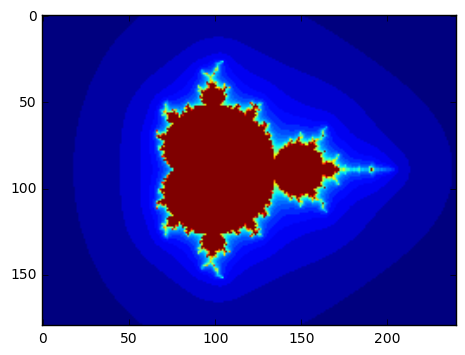

In [17]:
Z_grid = complex_plane_grid(rows=180, cols=240, center_point=0.5, theta=0, zoom=5/8)
Z, ET = Mandelbrot_set(Z_grid, et_max=32, et_dist=12)
hmb = plt.imshow(ET)

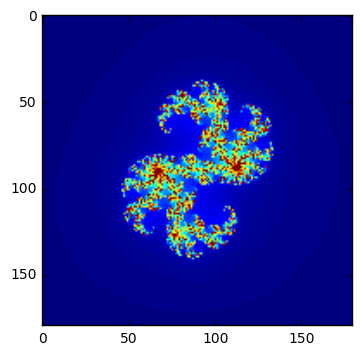

In [18]:
p=-0.32-0.037j
Z_grid = complex_plane_grid(rows=180, cols=180, center_point=0, theta=np.pi/6, zoom=1/2)
Z, ET = julia_set( Z_grid, p, et_max=128, et_dist=12.0)

h0 = plt.imshow(ET)

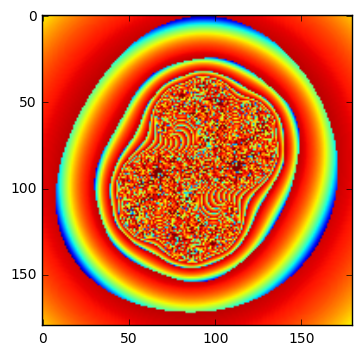

In [19]:
Zn = graphic_norm(Z)
h2 = plt.imshow(1-Zn)

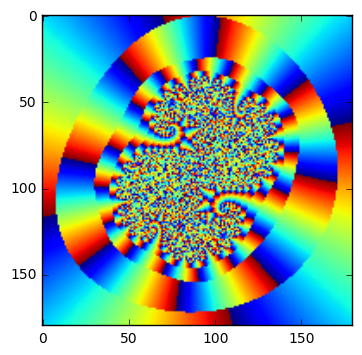

In [20]:
Zt = np.angle(Z)
h1 = plt.imshow(Zt)

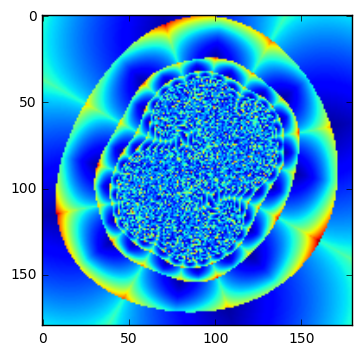

In [21]:
Zan = Zn - np.sqrt(np.abs(Zt / (np.pi**2)))
h2 = plt.imshow(Zan)

In [22]:
p = [2.76544+0.997995j, 50.1518+7.53287j]
Z_grid = complex_plane_grid(rows=180, cols=180, center_point=-0.25, theta=0, zoom=5/8)
Ztest = Z_grid.copy()
Z, ET = unicorn_in_utero( Z_grid, p, et_max=64, et_dist=32.0)
print(sum(sum(Ztest != Z_grid)))

/Users/mojo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in cdouble_scalars
/Users/mojo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in cdouble_scalars


0


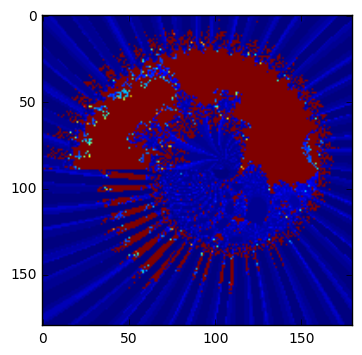

In [23]:
u0 = plt.imshow(ET)

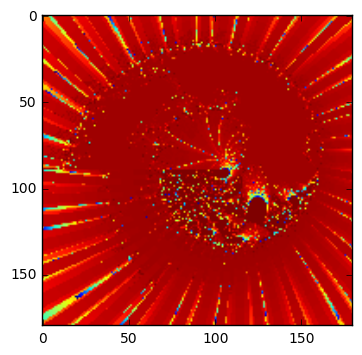

In [24]:
Zn = graphic_norm(Z)
u1 = plt.imshow(1-Zn)

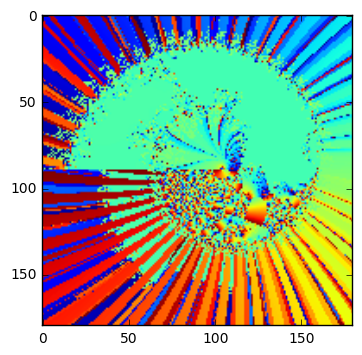

In [25]:
Za = np.pi / 2 - np.angle(Z)
u0 = plt.imshow(Za)